## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/statistikbanken/api
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables' pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data' pt 2: get request and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married'?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)

In [2]:
import pandas as pd
#5.A.
url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2020K1&CIVILSTAND=F%2CTOT"
data = pd.read_csv(url,sep=';')

divorce08 = data["INDHOLD"][0]/data["INDHOLD"][1]*100
divorce20 = data["INDHOLD"][2]/data["INDHOLD"][3]*100
pctDiff = divorce20 / divorce08 * 100 - 100
print("Percentage of divorced people in 2008: " + str(divorce08))
print("Percentage of divorced people in 2020: " + str(divorce20))
print("Difference in percentage points: " + str(divorce20 - divorce08))
print("Difference in percentage: " + str(pctDiff))



Percentage of divorced people in 2008: 7.832000892656421
Percentage of divorced people in 2020: 9.352741988640101
Difference in percentage points: 1.5207410959836807
Difference in percentage: 19.417018930750956


In [12]:
#5.B.
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&Tid=2020K1&CIVILSTAND=TOT%2CU&K%C3%98N=TOT&OMR%C3%85DE=101%2C851%2C561%2C461%2C751&ALDER=IALT'
data = pd.read_csv(url,sep=';')
not_married_pct = {data['OMRÅDE'][not_married][4:]:data['INDHOLD'][not_married]/data['INDHOLD'][all_people]*100 for not_married, all_people in zip(range(5,10),range(0,5))}

#result = {}
#for not_married, all_people in zip(range(5,10),range(0,5)):
#    pct_not_married = data['INDHOLD'][not_married]/data['INDHOLD'][all_people]*100
#    city = data['OMRÅDE'][not_married][4:]
#    result[city] = pct_not_married

sorted(not_married_pct,key=not_married_pct.get, reverse=True)


['København', 'Aarhus', 'Odense', 'Aalborg', 'Esbjerg']

<IPython.core.display.Javascript object>


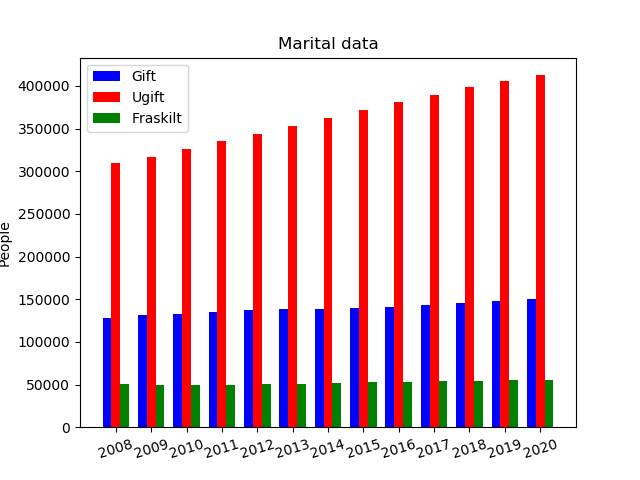

In [3]:
#5.C.
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G%2CU%2CF&OMR%C3%85DE=101&Tid=*"
data = pd.read_csv(url, sep=";")
married_mask = ((data["CIVILSTAND"] == "Gift/separeret") & (data["TID"].str.contains("K1")))
not_married_mask = ((data["CIVILSTAND"] == "Ugift") & (data["TID"].str.contains("K1")))
divorced_mask = ((data["CIVILSTAND"] == "Fraskilt") & (data["TID"].str.contains("K1")))
married = data[married_mask]
not_married = data[not_married_mask]
divorced = data[divorced_mask]


married = {married["TID"][index][:-2]:married["INDHOLD"][index] for index in married.index}
not_married = {not_married["TID"][index][:-2]:not_married["INDHOLD"][index] for index in not_married.index}
divorced = {divorced["TID"][index][:-2]:divorced["INDHOLD"][index] for index in divorced.index}


max_y_value = max([max(married.values()), max(not_married.values()), max(divorced.values())])
x_values = np.arange(len(married))

fig, ax = plt.subplots()
married_bar = ax.bar(x_values - 0.25, married.values(), width=0.25, color="b")
not_married_bar = ax.bar(x_values, not_married.values(), width=0.25, color="r")
divorced_bar = ax.bar(x_values + 0.25, divorced.values(), width=0.25, color="g")
ax.set_ylabel("People")
ax.set_title("Marital data")
ax.legend((married_bar[0], not_married_bar[0], divorced_bar[0]), ("Gift", "Ugift", "Fraskilt"))
plt.xticks(range(len(married.keys())), labels=married.keys(), rotation=17)
plt.show()

<IPython.core.display.Javascript object>


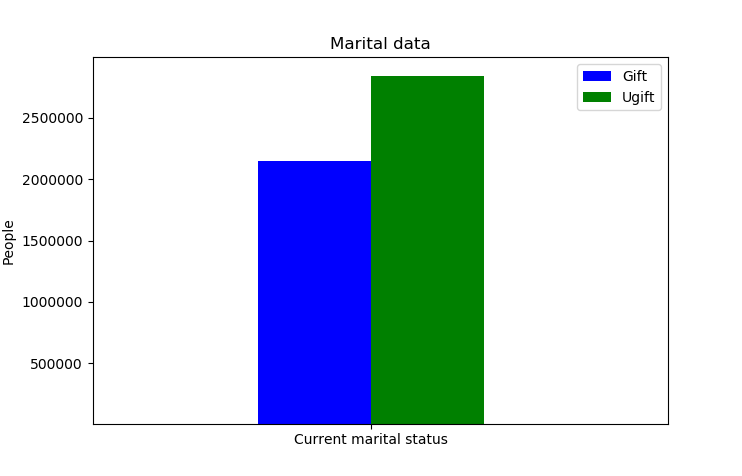

In [19]:
#5.D.
#Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)
url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=000&CIVILSTAND=G%2CU&Tid=2020K1&ALDER=IALT"
data = pd.read_csv(url,sep=';')

married = [data["INDHOLD"][0]]
not_married = [data["INDHOLD"][1]]

fig, ax = plt.subplots()
married_bar = ax.bar(1 - 0.125, married, width=0.25, color="b")
not_married_bar = ax.bar(1 + 0.125, not_married, width=0.25, color="g")
ax.set_ylabel("People")
ax.set_title("Marital data")
ax.legend((married_bar[0], not_married_bar[0]), ("Gift", "Ugift"))
plt.xticks(range(2), labels=["","Current marital status"])
plt.show()

